# Learn by doing: My first Kaggle entry 
### Using Python

Welcome! As you may or may not be aware, [Kaggle](https://www.kaggle.com/) is a popular site for data science competitions, where peopel from all over the globe can participate to build prediction engines.
Since I have never actually used the site (although apparently I made an account over 6 years ago). I decided to finally give it a try with the classic Titanic dataset, attempting to predict survival

In [22]:
# numbers
import pandas as pd
import numpy as np
import scipy as sp 

# plots
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

# misc
import random
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## Load the data
Ok, now that we have loaded the pandas library, we can use the `read_csv` function to not only load the data into python, but also convert it into a pandas data frame - a powerful and popular class.

In [23]:
# we will load in our training and testing dataset
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


## EDA
Describing the data.

In [24]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
len(data.index) - data.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
data2 = pd.get_dummies(data, columns =['Pclass', 'Embarked', 'Sex'])
data2 = data2.fillna(data2.median()['Age'])
len(data2.index) - data2.count()

PassengerId    0
Survived       0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [27]:
bygroup_class = data2.groupby(['Survived'])
bygroup_class['Fare'].describe()
#train.head()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


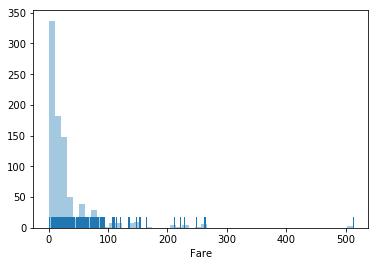

In [28]:
sns.distplot(data2['Fare'], kde = False, rug=True)

In [29]:
data2.describe(include=['O'])

,Name,Ticket,Cabin
count,891,891,891.0
unique,891,681,148.0
top,"Canavan, Miss. Mary",1601,28.0
freq,1,7,687.0


In [30]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [31]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


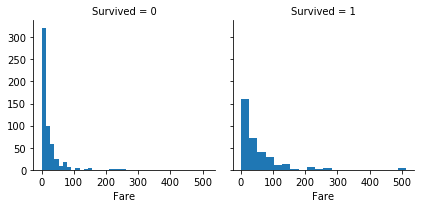

In [32]:
g = sns.FacetGrid(data2, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

In [33]:
random.seed(100)
train_f, test_f = train_test_split(data2, test_size=0.2)

In [34]:
lr_model = sm.Logit(train_f['Survived'], train_f[['Age','Fare','Parch','Pclass_1','Pclass_2',
                                            "Embarked_C", 'Embarked_Q', "Sex_female", 'SibSp']])
res = lr_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.437912
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Wed, 11 Oct 2017   Pseudo R-squ.:                  0.3415
Time:                        16:44:51   Log-Likelihood:                -311.79
converged:                       True   LL-Null:                       -473.51
                                        LLR p-value:                 4.192e-65
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0679      0.006    -11.450      0.000      -0.080      -0.056
Fare           0.0037      0.003      1.165      0.244      -0.003       0.010
Parch         -0.3687      0.158     -2.332      0.020      -0.679      -0.059
Pclass_1       2.1729      0.343      6.341      0.000       1.501       2.844
Pclass_2       0.9127      0.255      3.579      0.000       0.413       1.412
Embarked_C     0.4323      0.267      1.617      0.106      -0.092       0.956
Embarked_Q    -0.2320      0.384     -0.605      0.545      -0.984       0.520
Sex_female     2.7470      0.234     11.741      0.000       2.288       3.206
SibSp         -0.5541      0.136     -4.077      0.000      -0.820      -0.288
==============================================================================
"""

In [35]:
train_f['Fem_Age'] = train_f['Sex_female'] * train_f['Age']
test_f['Fem_Age'] = test_f['Sex_female'] * test_f['Age']

/Users/Matthew/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Matthew/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [36]:
lr2_model = sm.Logit(train_f['Survived'], train_f[['Age','Fare','Parch','Pclass_1','Pclass_2',
                                            "Embarked_C", 'Embarked_Q', "Sex_female", 'Fem_Age', 'SibSp']])
res2 = lr2_model.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.422896
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Oct 2017   Pseudo R-squ.:                  0.3641
Time:                        16:45:25   Log-Likelihood:                -301.10
converged:                       True   LL-Null:                       -473.51
                                        LLR p-value:                 7.839e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0773      0.007    -11.651      0.000      -0.090      -0.064
Fare           0.0030      0.003      0.976      0.329      -0.003       0.009
Parch         -0.3120      0.147     -2.129      0.033      -0.599      -0.025
Pclass_1       2.2395      0.352      6.371      0.000       1.551       2.929
Pclass_2       1.0035      0.256      3.913      0.000       0.501       1.506
Embarked_C     0.6463      0.274      2.358      0.018       0.109       1.183
Embarked_Q    -0.0446      0.379     -0.118      0.906      -0.787       0.697
Sex_female     0.9395      0.435      2.162      0.031       0.088       1.791
Fem_Age        0.0683      0.015      4.471      0.000       0.038       0.098
SibSp         -0.4115      0.127     -3.230      0.001      -0.661      -0.162
==============================================================================
"""

In [37]:
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))
LR = likelihood_ratio(-311.79,-301.10)
p = sp.stats.distributions.chi2.sf(LR, 1)
print(p)

3.76680110782e-06


In [39]:
log_mod_pred_surv = res2.predict(test_f[['Age','Fare','Parch','Pclass_1','Pclass_2',
                                            "Embarked_C", 'Embarked_Q', "Sex_female", 
                                         'Fem_Age', 'SibSp']]) > 0.5



Ok! 

In [41]:
log_mod_pred_surv = res2.predict(test_f[['Age','Fare','Parch','Pclass_1','Pclass_2',
                                            "Embarked_C", 'Embarked_Q', "Sex_female", 
                                         'Fem_Age', 'SibSp']]) > 0.5
log_mod_wrong = ((log_mod_pred_surv - test_f['Survived'])**2)
log_mod_wrong.mean()

0.21787709497206703

In [47]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Build the model
rfc = RandomForestClassifier(n_estimators = 5000, min_samples_split = 5,
                             oob_score = True, n_jobs = 2
                            )

# Fit the model
rfc.fit(train_f[['Age','Fare','Parch','Pclass_1','Pclass_2',
                                            "Embarked_C", 'Embarked_Q', "Sex_female", 'Fem_Age',
                'SibSp']],
       y = train_f['Survived'])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [48]:
rf_mod_pred_surv = rfc.predict(test_f[['Age','Fare','Parch','Pclass_1','Pclass_2',
                                            "Embarked_C", 'Embarked_Q', "Sex_female", 'Fem_Age'
                                      , 'SibSp']])
rf_mod_wrong = ((rf_mod_pred_surv - test_f['Survived'])**2)
rf_mod_wrong.mean()

0.20670391061452514

In [52]:
test = pd.get_dummies(test, columns =['Pclass', 'Embarked', 'Sex'])
test = test.fillna(data2.median()['Age'])

test['Fem_Age'] = test['Sex_female'] * test['Age']

In [53]:
rf_mod_prediction = rfc.predict(test[['Age','Fare','Parch','Pclass_1','Pclass_2',
                                            "Embarked_C", 'Embarked_Q', "Sex_female", 'Fem_Age'
                                      , 'SibSp']])

In [56]:
#np.savetxt("foo.csv", rf_mod_prediction, delimiter=",")

In [57]:
rf_mod_prediction.head

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [65]:
test['Survived'] = rf_mod_prediction

In [66]:
test = test[['PassengerId',  'Survived']]

In [69]:
test.to_csv('foo.csv', index = False)

In [68]:
# 0.76 % accuraccy - middle of the road!




Object `to_csv` not found.
